In [1]:
#Import required libraries
#EDA libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Text Preprocessing 
import neattext.functions as nfx
from nltk import word_tokenize

# Transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

#Models
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
#Load Dataset
df = pd.read_csv('emotion_dataset_2.csv')

In [4]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [5]:
df.tail()

,Unnamed: 0,Emotion,Text,Clean_Text
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU
34791,34791,sadness,"I think about you baby, and I dream about you ...",think baby dream time


In [6]:
df.drop(columns=['Unnamed: 0', 'Clean_Text'],inplace=True)

In [7]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [8]:
df.shape

(34792, 2)

In [9]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

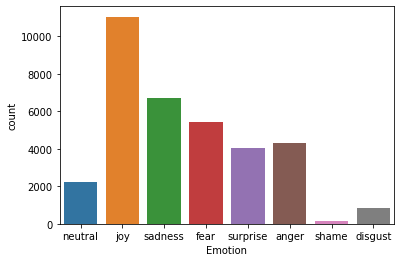

In [10]:
sns.countplot(x='Emotion',data=df)

In [11]:
#Drop null values
df.dropna(inplace=True)

In [12]:
#Cleaning Text
df['Cleaned'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
df

,Emotion,Text,Cleaned
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


In [14]:
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_stopwords)
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_punctuations)
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_urls)
df.tail()

,Emotion,Text,Cleaned
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU
34791,sadness,"I think about you baby, and I dream about you ...",think baby dream time


In [15]:
#Set feature and target variables
X = df['Cleaned']
y = df['Emotion']

In [16]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [17]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [18]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [19]:
pipe_lr.fit(X_train,y_train)

D:\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [21]:
#Model Evaluation
y_lr_pred = pipe_lr.predict(X_test)
print('Accuracy: {:.2f}%'.format(pipe_lr.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_lr_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_lr_pred))

Accuracy: 62.23%
F1 Score: 62.23
Confusion Matrix: 
 [[ 709    9   66  227   80  149    1   42]
 [  40   50   26   86    7   56    1   26]
 [  80    5 1068  236   39  143    0   74]
 [ 114    6  127 2500  117  265    1  181]
 [  13    1   10   94  491   56    0   10]
 [ 124    8   97  471   68 1151    1   95]
 [   0    0    1    6    1    2   26    0]
 [  52    6   45  403   28  145    1  501]]


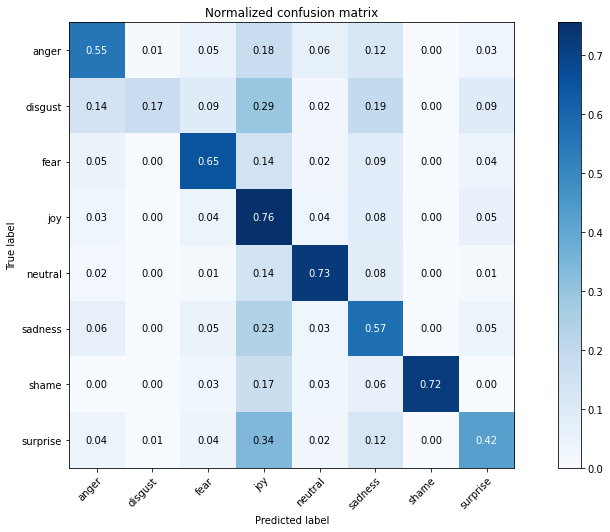

In [22]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_lr_pred, classes=pipe_lr.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## Naive Bayes

In [23]:
# Naive Bayes Pipeline
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])

In [24]:
pipe_nb.fit(X_train, y_train)
y_nb_pred = pipe_nb.predict(X_test)

In [25]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_nb.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_nb_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_nb_pred))

Accuracy: 57.08%
F1 Score: 57.08
Confusion Matrix: 
 [[ 641    0   56  369    5  199    0   13]
 [  31    7   23  142    1   78    0   10]
 [  76    2  986  364    0  159    0   58]
 [  66    0  100 2873    8  202    0   62]
 [  21    0   18  506   54   71    0    5]
 [  84    0   70  748    0 1078    0   35]
 [   8    0    7   14    1    6    0    0]
 [  48    0   44  639    0  131    0  319]]


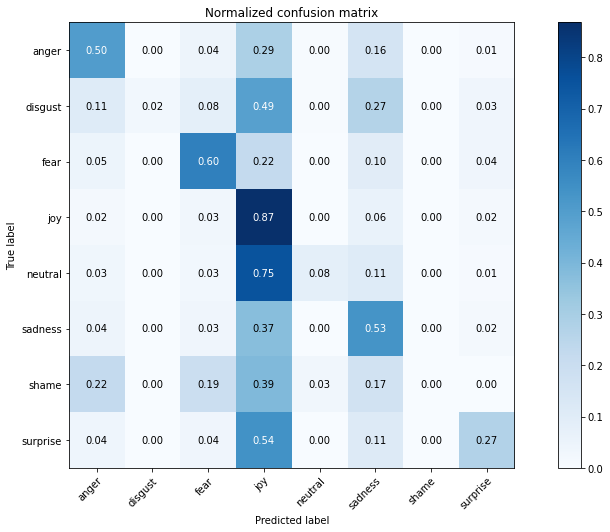

In [26]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_nb_pred, classes=pipe_nb.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## K-Nearest Neighbours

In [27]:
# KNN Pipeline
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn', KNeighborsClassifier())])

In [28]:
pipe_knn.fit(X_train, y_train)
y_knn_pred = pipe_knn.predict(X_test)

In [29]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_knn.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_knn_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_knn_pred))

Accuracy: 21.70%
F1 Score: 21.70
Confusion Matrix: 
 [[ 157    1   21   73  986   42    0    3]
 [   4    2    1   17  264    4    0    0]
 [  65    2  375   71 1095   29    0    8]
 [  74    1   82  768 2341   34    0   11]
 [   6    0    0   11  648   10    0    0]
 [  60    0   43  126 1505  274    0    7]
 [   1    0    0    3   32    0    0    0]
 [  25    0   17  113  975   10    0   41]]


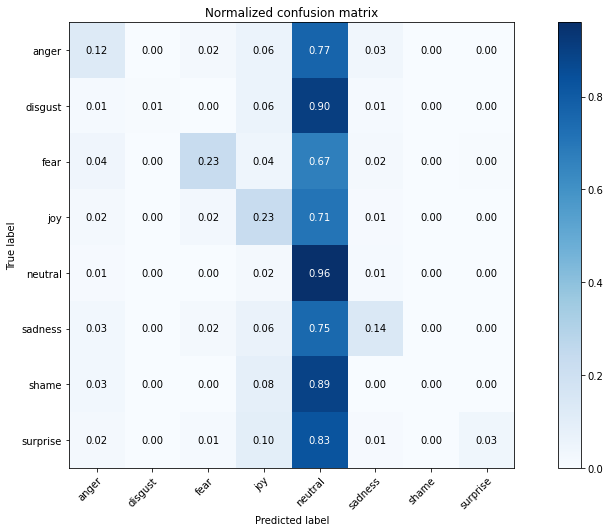

In [30]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_knn_pred, classes=pipe_knn.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()


## Decision Tree

In [31]:
# Tree Pipeline
pipe_tree = Pipeline(steps=[('cv',CountVectorizer()),('tree', DecisionTreeClassifier())])

In [32]:
pipe_tree.fit(X_train, y_train)
y_tree_pred = pipe_tree.predict(X_test)

In [33]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_tree.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_tree_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_tree_pred))

Accuracy: 53.90%
F1 Score: 53.90
Confusion Matrix: 
 [[ 658   16   59  199  138  168    1   44]
 [  44   46   13   59   49   62    1   18]
 [  96    9  994  200  119  136    0   91]
 [ 170   28  142 1975  429  354    1  212]
 [  35    1   15   69  499   38    0   18]
 [ 179   14   95  407  220  976    1  123]
 [   0    0    0    1    0    1   34    0]
 [  72   13   65  320  128  138    1  444]]


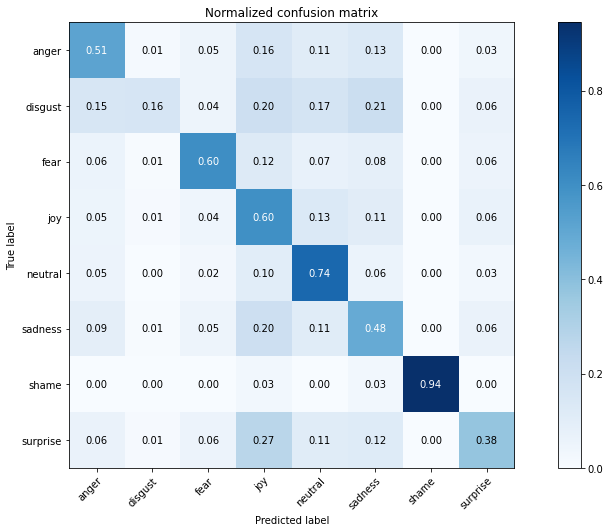

In [34]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_tree_pred, classes=pipe_tree.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## Random Forest

In [35]:
# Random Forest Pipeline
pipe_for = Pipeline(steps=[('cv',CountVectorizer()),('for', RandomForestClassifier())])

In [36]:
pipe_for.fit(X_train, y_train)
y_for_pred = pipe_for.predict(X_test)

In [37]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_for.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_for_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_for_pred))

Accuracy: 58.21%
F1 Score: 58.21
Confusion Matrix: 
 [[ 652    2   31  234  165  181    1   17]
 [  35   37    6   81   59   63    1   10]
 [  86    4 1001  244  142  120    0   48]
 [ 100    1   62 2377  448  255    1   67]
 [  17    0    6   68  542   40    0    2]
 [ 120    1   49  498  255 1052    1   39]
 [   0    0    0    2    0    1   33    0]
 [  51    2   44  446  140  115    1  382]]


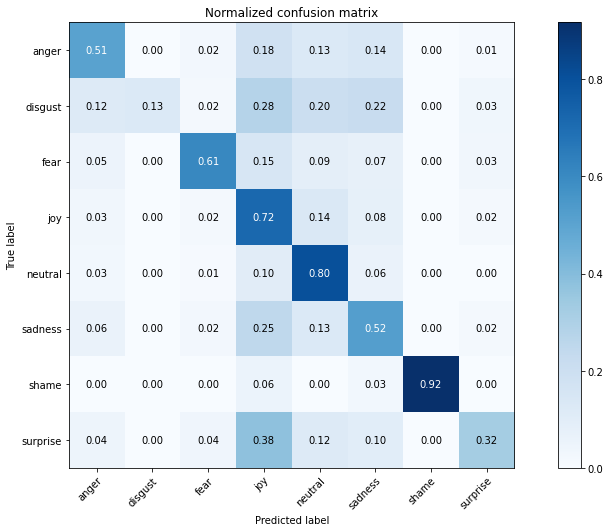

In [38]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_for_pred, classes=pipe_for.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## Support Vector Machine

In [39]:
# Random Forest Pipeline
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm', SVC(tol=1e-05))])

In [40]:
pipe_svm.fit(X_train, y_train)
y_svm_pred = pipe_svm.predict(X_test)

In [41]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_svm.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_svm_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_svm_pred))

Accuracy: 61.37%
F1 Score: 61.37
Confusion Matrix: 
 [[ 587    0   35  414   69  163    1   14]
 [  28    9    9  174    0   63    1    8]
 [  58    0  972  438   25  122    0   30]
 [  61    0   41 2872   88  189    1   59]
 [   6    0    7  109  511   41    0    1]
 [  77    0   49  745   53 1055    1   35]
 [   1    0    1   11    0    2   21    0]
 [  32    0   39  614   12  104    1  379]]


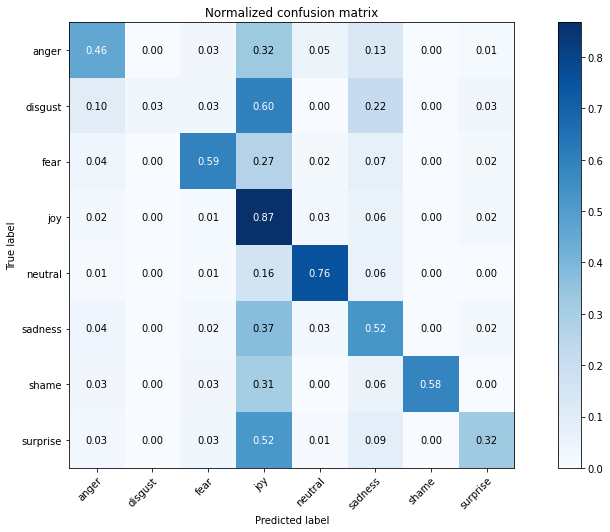

In [42]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_svm_pred, classes=pipe_svm.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## Model Comparison

In [43]:
com = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest', 'Support Vector Machine'],
                                     'Accuracy': ['62.07%', '56.82%', '61.81%', '21.92%', '52.26%', '56.98%', '61.09%'],
                                     'F1 Score':  [62.07, 56.82, 61.81, 21.92, 52.26, 56.98, 61.09] })
com.sort_values(by=['F1 Score'], ascending= False)

,Model,Accuracy,F1 Score
0,Logistic Regression,62.07%,62.07
2,Stochastic Gradient Descent,61.81%,61.81
6,Support Vector Machine,61.09%,61.09
5,Random Forest,56.98%,56.98
1,Naive Bayes,56.82%,56.82
4,Decision Tree,52.26%,52.26
3,K-Nearest Neighbours,21.92%,21.92


## Final Model

In [44]:
# Save Model & Pipeline
import pickle
pickle.dump(pipe_lr, open('emo_cls.pkl', 'wb'))

In [47]:
#Test
model = pickle.load(open("emo_cls.pkl", 'rb'))

message = "It was a total surprise"
model.predict([message])

array(['surprise'], dtype=object)